In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import rioxarray
from matplotlib.colors import LinearSegmentedColormap

In [10]:
raster = rioxarray.open_rasterio(Path.cwd() / "data/sentinel/kars_extent.tif")

raster_filled = raster.fillna(0)

output_path = Path.cwd() / "data/sentinel/kars_extent_nan_filled.tif"

print(f"Saved filled raster to: {output_path}")

raster_filled.rio.to_raster(
    Path.cwd() / "data/sentinel/kars_extent_filled_optimized.tif",
    driver="GTiff",          # File format (GeoTIFF)
    dtype="float32",         # Data type
    compress="LZW",          # Compression algorithm
    tiled=True,              # Use internal tiling (better performance)
    compute=True             # Execute immediately (relevant with dask)
)


Saved filled raster to: /Users/taddbindas/projects/NGWPC/f1_trainer/data/sentinel/kars_extent_nan_filled.tif


In [11]:
raster = rioxarray.open_rasterio(Path.cwd() / "data/sentinel/cloud_cutout_extent.tif")

raster_filled = raster.fillna(0)

output_path = Path.cwd() / "data/sentinel/cloud_cutout_extent_filled_optimized.tif"

print(f"Saved filled raster to: {output_path}")

raster_filled.rio.to_raster(
    Path.cwd() / "data/sentinel/cloud_cutout_extent_filled_optimized.tif",
    driver="GTiff",          # File format (GeoTIFF)
    dtype="float32",         # Data type
    compress="LZW",          # Compression algorithm
    tiled=True,              # Use internal tiling (better performance)
    compute=True             # Execute immediately (relevant with dask)
)

Saved filled raster to: /Users/taddbindas/projects/NGWPC/f1_trainer/data/sentinel/cloud_cutout_extent_filled_optimized.tif


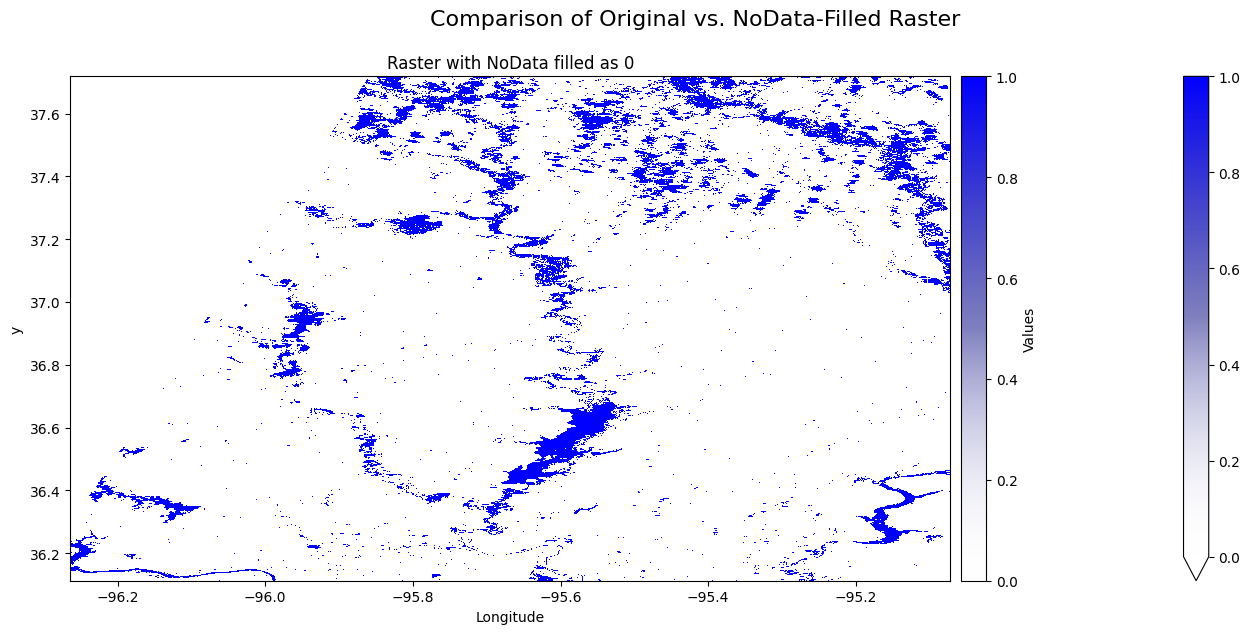

In [9]:
# Create a figure with two subplots side by side
fig, ax2 = plt.subplots(1, 1, figsize=(14, 6))

# Custom colormap for flood mapping (blue for water)
colors = [(1, 1, 1, 0), (0, 0, 0.5, 0.5), (0, 0, 1, 1)]  # Transparent to dark blue
water_cmap = LinearSegmentedColormap.from_list("water_cmap", colors)

# Plot the filled raster 
im2 = raster_filled.plot(ax=ax2, cmap=water_cmap, vmin=0, vmax=1)
ax2.set_title("Raster with NoData filled as 0")
ax2.set_xlabel("Longitude")

cbar2 = plt.colorbar(im2, ax=ax2, pad=0.01)
cbar2.set_label("Values")

# Adjust layout
plt.tight_layout()

# Add a main title
plt.suptitle("Comparison of Original vs. NoData-Filled Raster", fontsize=16, y=1.05)


# Show the plot
plt.show()
